# Predição de AVC

In [729]:
import pandas as pd
import matplotlib.pyplot as plt

## Análise Exploratória

In [730]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [732]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [733]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

## Visualização de Dados

In [734]:
df_stroke = df[df["stroke"] == 1]
df_no_stroke = df[df["stroke"] == 0]

### Criação de Hipoteses

#### Hipotese 01: Idade interfere na chance de AVC

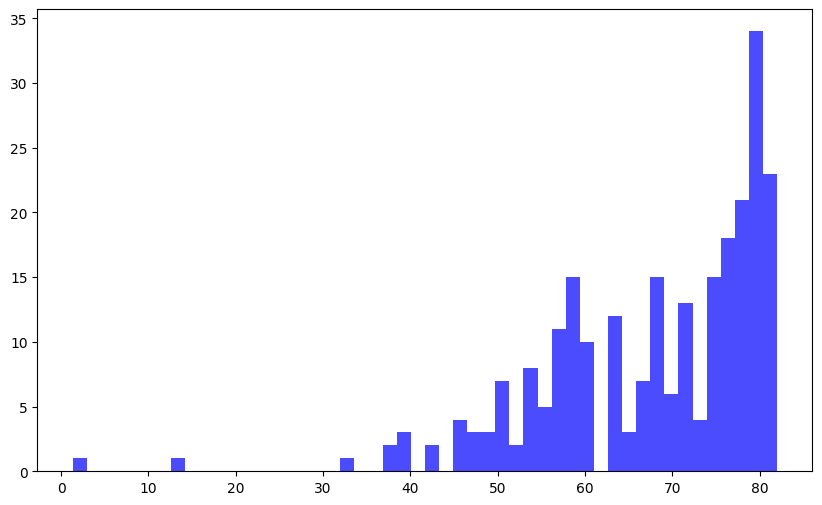

In [735]:
plt.figure(figsize=(10, 6))
plt.hist(df_stroke["age"], bins=50, color='blue', alpha=0.7)
plt.show()

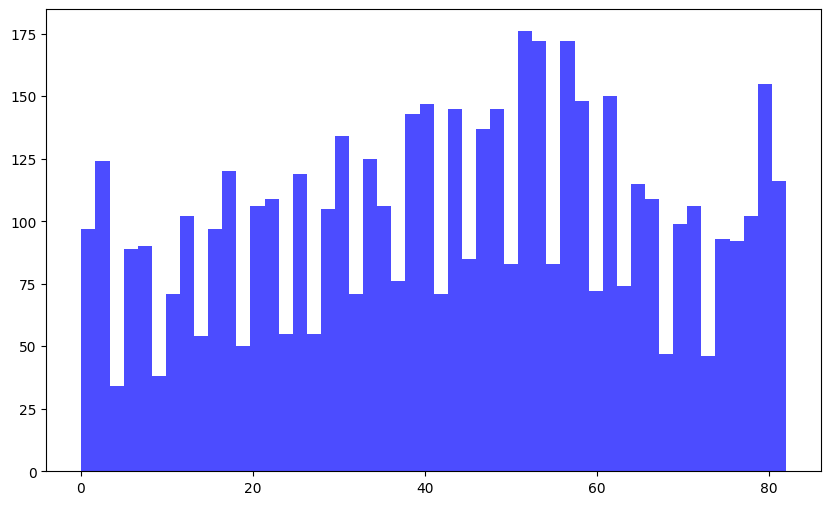

In [736]:
plt.figure(figsize=(10, 6))
plt.hist(df["age"], bins=50, color='blue', alpha=0.7)
plt.show()

- Pessoas mais velhas tem mais AVC

#### Hipotese 02: Pessoas com doença do Coração e Hipertensão tem mais AVC

##### Hypertension

In [737]:
df_hypertension = df[df["hypertension"] == 1]

df_hypertension["stroke"].value_counts(normalize=True)

stroke
0    0.86747
1    0.13253
Name: proportion, dtype: float64

In [738]:
df_no_hypertension = df[df["hypertension"] == 0]
df_no_hypertension["stroke"].value_counts(normalize=True)

stroke
0    0.960321
1    0.039679
Name: proportion, dtype: float64

- Em média, pessoas com hipertensão sofrem 3 vezes mais AVC do que pessoas que não tem.

##### Doenças do Coração

In [739]:
df_heart_disease = df[df["heart_disease"] == 1]
df_no_heart_disease = df[df["heart_disease"] == 0]

df_heart_disease["stroke"].value_counts(normalize=True),df_no_heart_disease["stroke"].value_counts(normalize=True)

(stroke
 0    0.82971
 1    0.17029
 Name: proportion, dtype: float64,
 stroke
 0    0.958213
 1    0.041787
 Name: proportion, dtype: float64)

- Aumento de 4 vezes

##### Os dois

In [740]:
df_heart_disease_and_hypertension = df[(df["heart_disease"] == 1) & (df["hypertension"] == 1)]
df_no_heart_disease_and_hypertension = df[(df["heart_disease"] == 0) & (df["hypertension"] == 0)]

df_heart_disease_and_hypertension["stroke"].value_counts(normalize=True), df_no_heart_disease_and_hypertension["stroke"].value_counts(normalize=True)

(stroke
 0    0.796875
 1    0.203125
 Name: proportion, dtype: float64,
 stroke
 0    0.966136
 1    0.033864
 Name: proportion, dtype: float64)

- Correlação forte!!!!

### Análise de outlier em BMI

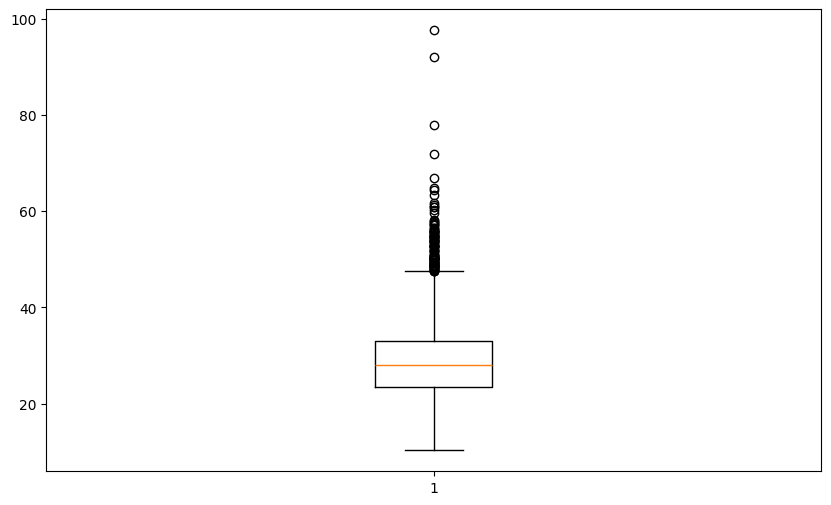

In [741]:
df_bminonull = df[df["bmi"].notnull()]
plt.figure(figsize=(10, 6))
plt.boxplot(df_bminonull["bmi"])
plt.show()

Dois valores apenas acima de 80

#### Limpeza dos Outliers de BMI

In [742]:
df_bmi_80 = df_bminonull[df_bminonull["bmi"] > 80]

df_bmi_80

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [743]:
df = df.drop(df_bmi_80.index)

### Análise de outlier em idade

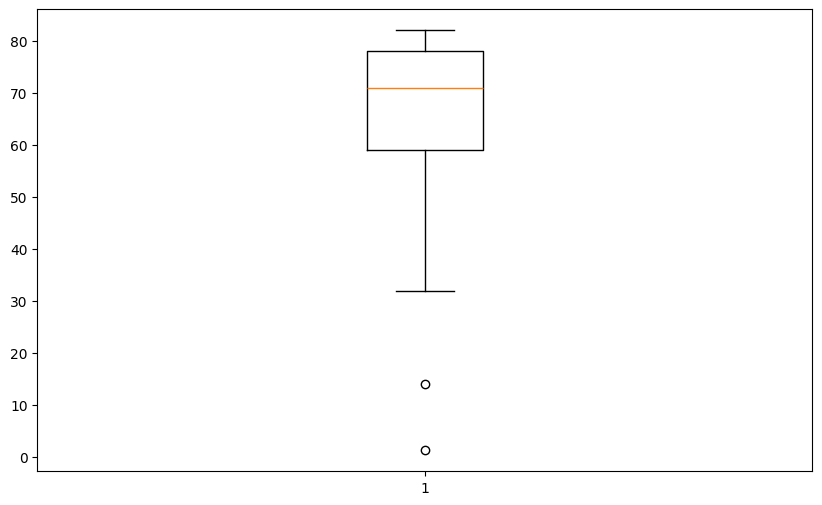

In [744]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_stroke["age"])
plt.show()

## Manipulação e Limpeza de Dados

- Valores Nulos de BMI
- Valores Inconsistentes de AGE
- Análise de Outliers de Glucose Level
- Codificação de Variáveis Categóricas

### Análise de Valores Nulos, Faltantes ou Inconsistentes 

#### Valores nulos de BMI

In [745]:
df_null = df[df["bmi"].isnull()]
df_null["stroke"].value_counts()

stroke
0    161
1     40
Name: count, dtype: int64

In [746]:
df_women = df[df["gender"] == "Female"]
df_men = df[df["gender"] == "Male"]

df_men["bmi"].mean(), df_women["bmi"].mean()

(np.float64(28.5820806371329), np.float64(29.065757680358992))

In [747]:
female_mean = df_women["bmi"].mean()
male_mean = df_men["bmi"].mean()

for index, row in df_null.iterrows():
    if pd.isnull(row["bmi"]):
        if row["gender"] == "Female":
            df.loc[index, "bmi"] = female_mean
        else:
            df.loc[index, "bmi"] = male_mean


In [748]:
df["bmi"].isnull().sum()

np.int64(0)

#### Valores inconsistentes de Age

In [749]:
5.0 == 5

True

In [750]:
var = 5.0
var.is_integer()

True

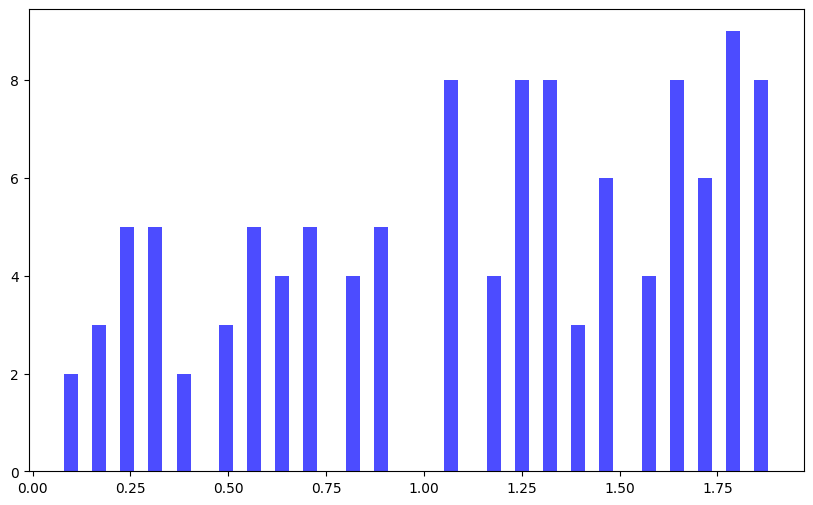

In [751]:
df_age_float = df[df["age"].apply(lambda x: x.is_integer() == False)]
plt.figure(figsize=(10, 6))
plt.hist(df_age_float["age"], bins=50, color='blue', alpha=0.7)
plt.show()

In [752]:
df_age_float["stroke"].value_counts()

stroke
0    114
1      1
Name: count, dtype: int64

In [753]:
df = df.drop(df_age_float.index)

In [754]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,36440.160425,44.202483,0.099339,0.055277,106.420110,29.092798,0.049670
std,21205.640276,21.940608,0.299147,0.228544,45.563248,7.501737,0.217283
min,67.000000,1.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,17608.000000,27.000000,0.000000,0.000000,77.420000,24.100000,0.000000
50%,36825.000000,45.000000,0.000000,0.000000,91.930000,28.582081,0.000000
75%,54620.000000,61.000000,0.000000,0.000000,114.180000,32.900000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,78.000000,1.000000


### Análise de Outliers

#### Análise de Outlier em Age

##### DF Geral

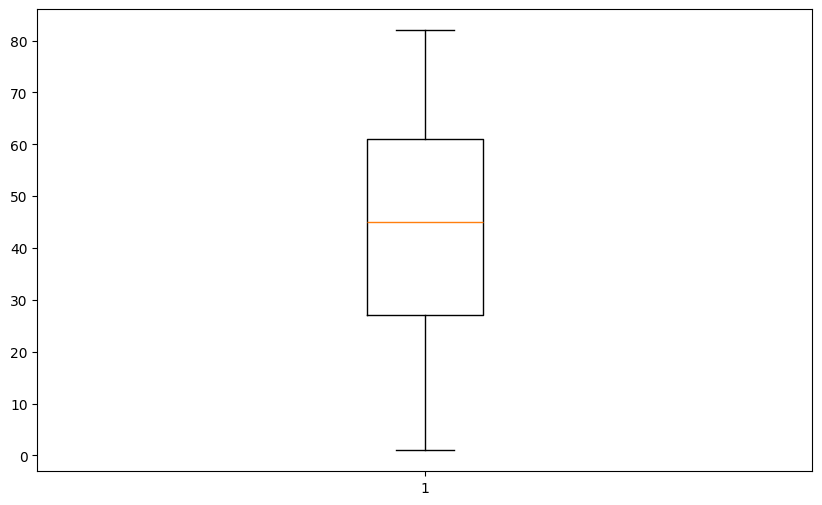

In [755]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["age"])
plt.show()

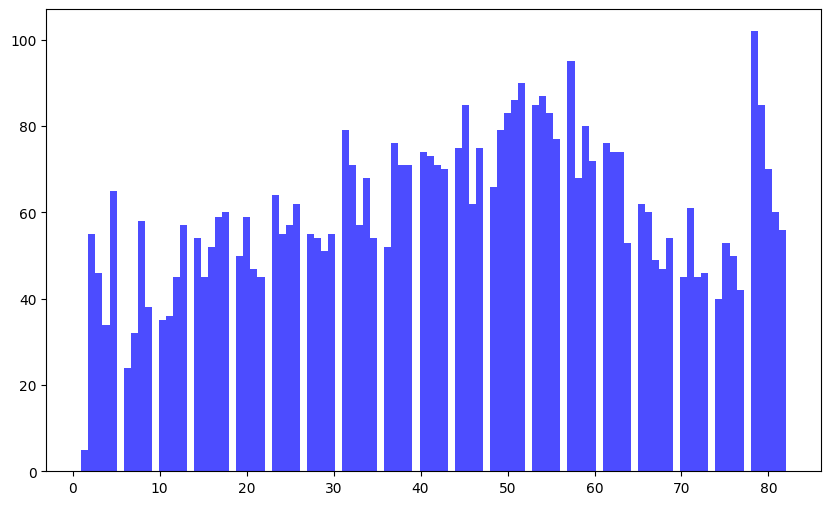

In [756]:
plt.figure(figsize=(10, 6))
plt.hist(df["age"], bins=100, color='blue', alpha=0.7)
plt.show()

##### DF STROKE

###### Gráficos

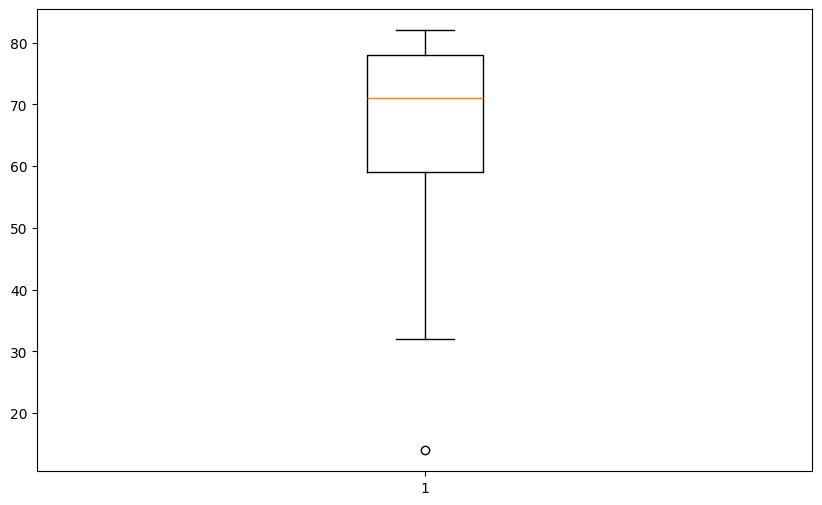

In [757]:
df_stroke = df[df["stroke"] == 1]
plt.figure(figsize=(10, 6))
plt.boxplot(df_stroke["age"])
plt.show()

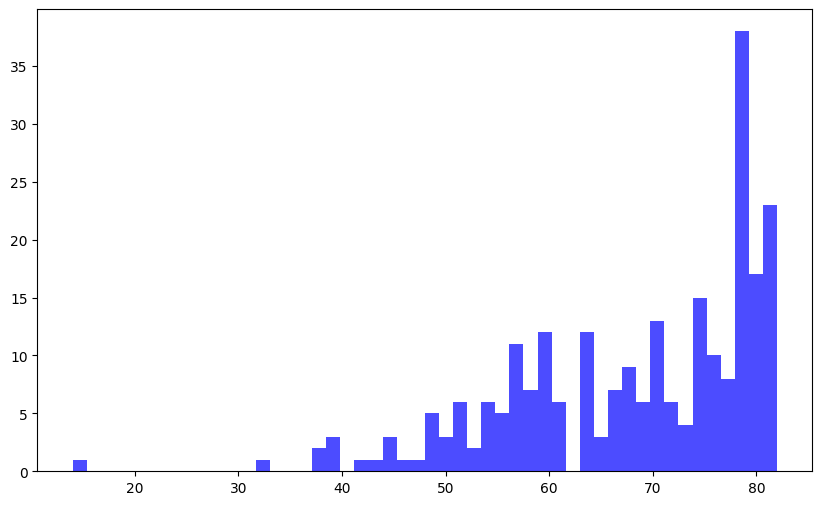

In [758]:
plt.figure(figsize=(10, 6))
plt.hist(df_stroke["age"], bins=50, color='blue', alpha=0.7)
plt.show()

###### Limpeza

In [759]:
df_stroke = df[df["stroke"] == 1]
df_outliers_idade = df_stroke[df_stroke["age"] < 20]
df_outliers_idade

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [760]:
df = df.drop(df_outliers_idade.index)

#### Análise de Outliers em Glocuse Level

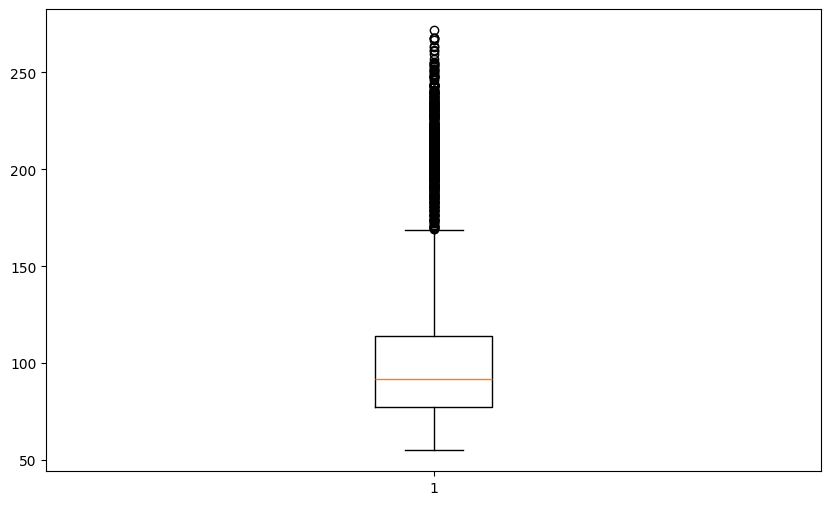

In [761]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["avg_glucose_level"])
plt.show()

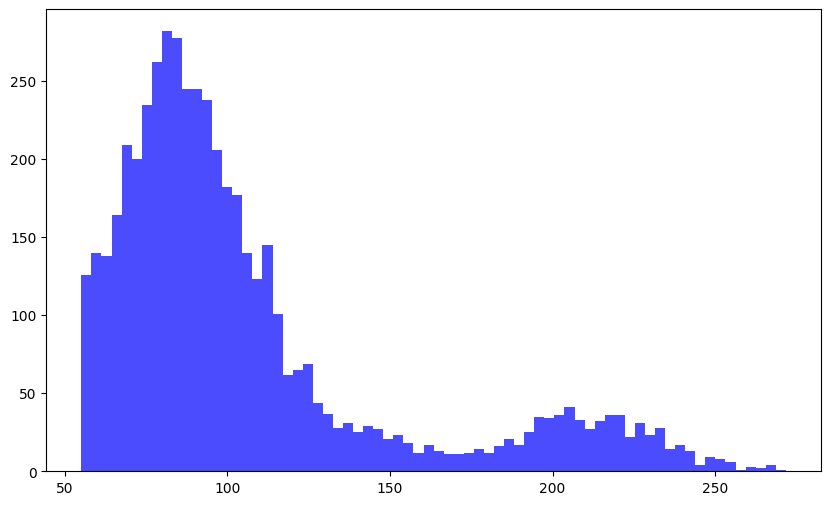

In [762]:
plt.figure(figsize=(10, 6))
plt.hist(df["avg_glucose_level"], bins=70, color='blue', alpha=0.7)
plt.show()

### Codificação de variáveis categóricas

In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4992 non-null   int64  
 1   gender             4992 non-null   object 
 2   age                4992 non-null   float64
 3   hypertension       4992 non-null   int64  
 4   heart_disease      4992 non-null   int64  
 5   ever_married       4992 non-null   object 
 6   work_type          4992 non-null   object 
 7   Residence_type     4992 non-null   object 
 8   avg_glucose_level  4992 non-null   float64
 9   bmi                4992 non-null   float64
 10  smoking_status     4992 non-null   object 
 11  stroke             4992 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 507.0+ KB


In [764]:
df["gender"] = df["gender"].map({"Female": 0, "Male": 1})
df["ever_married"] = df["ever_married"].map({"No": 0, "Yes": 1})
df["work_type"] = df["work_type"].map({"children": 0, "Govt_job": 1, "Never_worked": 2, "Private": 3, "Self-employed": 4})
df["Residence_type"] = df["Residence_type"].map({"Rural": 0, "Urban": 1})
df["smoking_status"] = df["smoking_status"].map({"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3})

In [765]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1,3,1,228.69,36.6,0,1


In [766]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4992.000000,4991.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000
mean,36437.510417,0.411541,44.208534,0.099359,0.055288,0.671474,2.553285,0.508213,106.429824,29.092436,1.552484,0.049479
std,21206.937708,0.492162,21.938640,0.299173,0.228565,0.469724,1.234954,0.499983,45.562642,7.502445,1.083403,0.216888
min,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,17598.250000,0.000000,27.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.420000,24.100000,1.000000,0.000000
50%,36822.500000,0.000000,45.000000,0.000000,0.000000,1.000000,3.000000,1.000000,91.940000,28.582081,1.000000,0.000000
75%,54625.750000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.187500,32.900000,3.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,78.000000,3.000000,1.000000


### Limpeza da Coluna ID

In [767]:
df = df.drop(columns=["id"])
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,3,1,228.69,36.6,0,1


## Análise de Correlação de Colunas

In [768]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,3,1,228.69,36.6,0,1


In [769]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.019985,0.021606,0.088023,-0.024695,-0.066025,-0.007394,0.055802,-0.028672,0.034039,0.011919
age,-0.019985,1.000000,0.275215,0.264453,0.660746,0.495555,0.014849,0.238210,0.295588,-0.340165,0.249681
hypertension,0.021606,0.275215,1.000000,0.107173,0.158186,0.119073,-0.006796,0.175303,0.145995,-0.122415,0.128016
heart_disease,0.088023,0.264453,0.107173,1.000000,0.109496,0.091776,0.003039,0.161368,0.033520,-0.058649,0.134766
ever_married,-0.024695,0.660746,0.158186,0.109496,1.000000,0.389051,0.006372,0.151152,0.314269,-0.273208,0.106488
work_type,-0.066025,0.495555,0.119073,0.091776,0.389051,1.000000,-0.003143,0.086513,0.300491,-0.299048,0.081790
Residence_type,-0.007394,0.014849,-0.006796,0.003039,0.006372,-0.003143,1.000000,-0.004881,0.003348,0.004937,0.015652
avg_glucose_level,0.055802,0.238210,0.175303,0.161368,0.151152,0.086513,-0.004881,1.000000,0.172993,-0.092391,0.133557
bmi,-0.028672,0.295588,0.145995,0.033520,0.314269,0.300491,0.003348,0.172993,1.000000,-0.205106,0.034002
smoking_status,0.034039,-0.340165,-0.122415,-0.058649,-0.273208,-0.299048,0.004937,-0.092391,-0.205106,1.000000,-0.063494


In [ ]:
df = df.drop(columns=["gender", "Residence_type", "bmi", ])

## Desenvolvimento dos Modelos de Classficação

In [771]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelos sem SMOTE

#### KNN

In [772]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


#### Logistic Regression

In [804]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

confusion = confusion_matrix(y_test, y_pred_log_reg)
print(f"Confusion Matrix: \n{confusion}")
recall = confusion[1][1] / (confusion[1][1] + confusion[1][0])
print(f"Recall: {recall:.2f}")

Logistic Regression Accuracy: 0.94
Confusion Matrix: 
[[939   0]
 [ 60   0]]
Recall: 0.00


### Desbalanceamento de Classes -- SMOTE

#### OverSampling

In [774]:
y_train.value_counts()

stroke
0    3806
1     187
Name: count, dtype: int64

In [775]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

stroke
1    3806
0    3806
Name: count, dtype: int64

##### Logistic Regression

In [805]:
log_reg_resampled = LogisticRegression(max_iter=1000)
log_reg_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg_resampled = log_reg_resampled.predict(X_test)

accuracy_log_reg_resampled = accuracy_score(y_test, y_pred_log_reg_resampled)
print(f"Logistic Regression with SMOTE Accuracy: {accuracy_log_reg_resampled:.2f}")

confusion_resampled = confusion_matrix(y_test, y_pred_log_reg_resampled)
print(f"Confusion Matrix with SMOTE: \n{confusion_resampled}")
recall_resampled = confusion_resampled[1][1] / (confusion_resampled[1][1] + confusion_resampled[1][0])
print(f"Recall with SMOTE: {recall_resampled:.2f}")

Logistic Regression with SMOTE Accuracy: 0.78
Confusion Matrix with SMOTE: 
[[738 201]
 [ 14  46]]
Recall with SMOTE: 0.77


##### KNN

In [806]:
knn_oversampled = KNeighborsClassifier()

knn_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_oversampled = knn_oversampled.predict(X_test)

accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
print(f"KNN with SMOTE Accuracy: {accuracy_oversampled:.2f}")

confusion_oversampled = confusion_matrix(y_test, y_pred_oversampled)
print(f"Confusion Matrix with SMOTE: \n{confusion_oversampled}")

recall_oversampled = confusion_oversampled[1][1] / (confusion_oversampled[1][1] + confusion_oversampled[1][0])
print(f"Recall with SMOTE: {recall_oversampled:.2f}")

KNN with SMOTE Accuracy: 0.79
Confusion Matrix with SMOTE: 
[[761 178]
 [ 27  33]]
Recall with SMOTE: 0.55


#### UnderSampling 

In [807]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
y_train_under.value_counts()

stroke
0    187
1    187
Name: count, dtype: int64

##### Logistic Regression

In [808]:
log_reg_under = LogisticRegression(max_iter=1000)
log_reg_under.fit(X_train_under, y_train_under)
y_pred_log_reg_under = log_reg_under.predict(X_test)

accuracy_log_reg_under = accuracy_score(y_test, y_pred_log_reg_under)
print(f"Logistic Regression with Random Under Sampling Accuracy: {accuracy_log_reg_under:.2f}")

confusion_under = confusion_matrix(y_test, y_pred_log_reg_under)
print(f"Confusion Matrix with Random Under Sampling: \n{confusion_under}")

recall_under = confusion_under[1][1] / (confusion_under[1][1] + confusion_under[1][0])
print(f"Recall with Random Under Sampling: {recall_under:.2f}")

Logistic Regression with Random Under Sampling Accuracy: 0.73
Confusion Matrix with Random Under Sampling: 
[[684 255]
 [ 14  46]]
Recall with Random Under Sampling: 0.77


##### KNN

In [809]:
knn_under = KNeighborsClassifier()
knn_under.fit(X_train_under, y_train_under)
y_pred_under = knn_under.predict(X_test)

accuracy_under = accuracy_score(y_test, y_pred_under)
print(f"KNN with Random Under Sampling Accuracy: {accuracy_under:.2f}")

confusion_under_knn = confusion_matrix(y_test, y_pred_under)
print(f"Confusion Matrix with Random Under Sampling: \n{confusion_under_knn}")

recall_under_knn = confusion_under_knn[1][1] / (confusion_under_knn[1][1] + confusion_under_knn[1][0])
print(f"Recall with Random Under Sampling: {recall_under_knn:.2f}")

KNN with Random Under Sampling Accuracy: 0.70
Confusion Matrix with Random Under Sampling: 
[[646 293]
 [ 11  49]]
Recall with Random Under Sampling: 0.82


## Fine Tuning

### Logistic Regression Over

In [811]:
from sklearn.model_selection import GridSearchCV

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

log_reg_oversampled = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log_reg_oversampled, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_log_reg = grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)

accuracy_best_log_reg = accuracy_score(y_test, y_pred_best_log_reg)
print(f"Best Logistic Regression Accuracy: {accuracy_best_log_reg:.2f}")

confusion_best_log_reg = confusion_matrix(y_test, y_pred_best_log_reg)
print(f"Confusion Matrix with Best Parameters: \n{confusion_best_log_reg}")

recall_best_log_reg = confusion_best_log_reg[1][1] / (confusion_best_log_reg[1][1] + confusion_best_log_reg[1][0])
print(f"Recall with Best Parameters: {recall_best_log_reg:.2f}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.74
Confusion Matrix with Best Parameters: 
[[698 241]
 [ 16  44]]
Recall with Best Parameters: 0.73


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### KNN UnderSampling

In [814]:
knn_under = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [9],
    'weights': ['uniform'],
    'metric': ['manhattan']
}
grid_search_knn = GridSearchCV(knn_under, param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train_under, y_train_under)

best_params_knn = grid_search_knn.best_params_
print(f"Best parameters for KNN: {best_params_knn}")

best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Best KNN Accuracy: {accuracy_best_knn:.2f}")

confusion_best_knn = confusion_matrix(y_test, y_pred_best_knn)
print(f"Confusion Matrix with Best Parameters for KNN: \n{confusion_best_knn}")

recall_best_knn = confusion_best_knn[1][1] / (confusion_best_knn[1][1] + confusion_best_knn[1][0])
print(f"Recall with Best Parameters for KNN: {recall_best_knn:.2f}")

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best KNN Accuracy: 0.70
Confusion Matrix with Best Parameters for KNN: 
[[650 289]
 [ 15  45]]
Recall with Best Parameters for KNN: 0.75


## Cross Validation

In [815]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(knn_under, X_train_under, y_train_under, cv=5, scoring='recall')
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean():.2f}")

Cross-validation scores: [0.86486486 0.83783784 0.81578947 0.76315789 0.78378378]
Mean cross-validation score: 0.81
